# LSTM


### RNN Layer

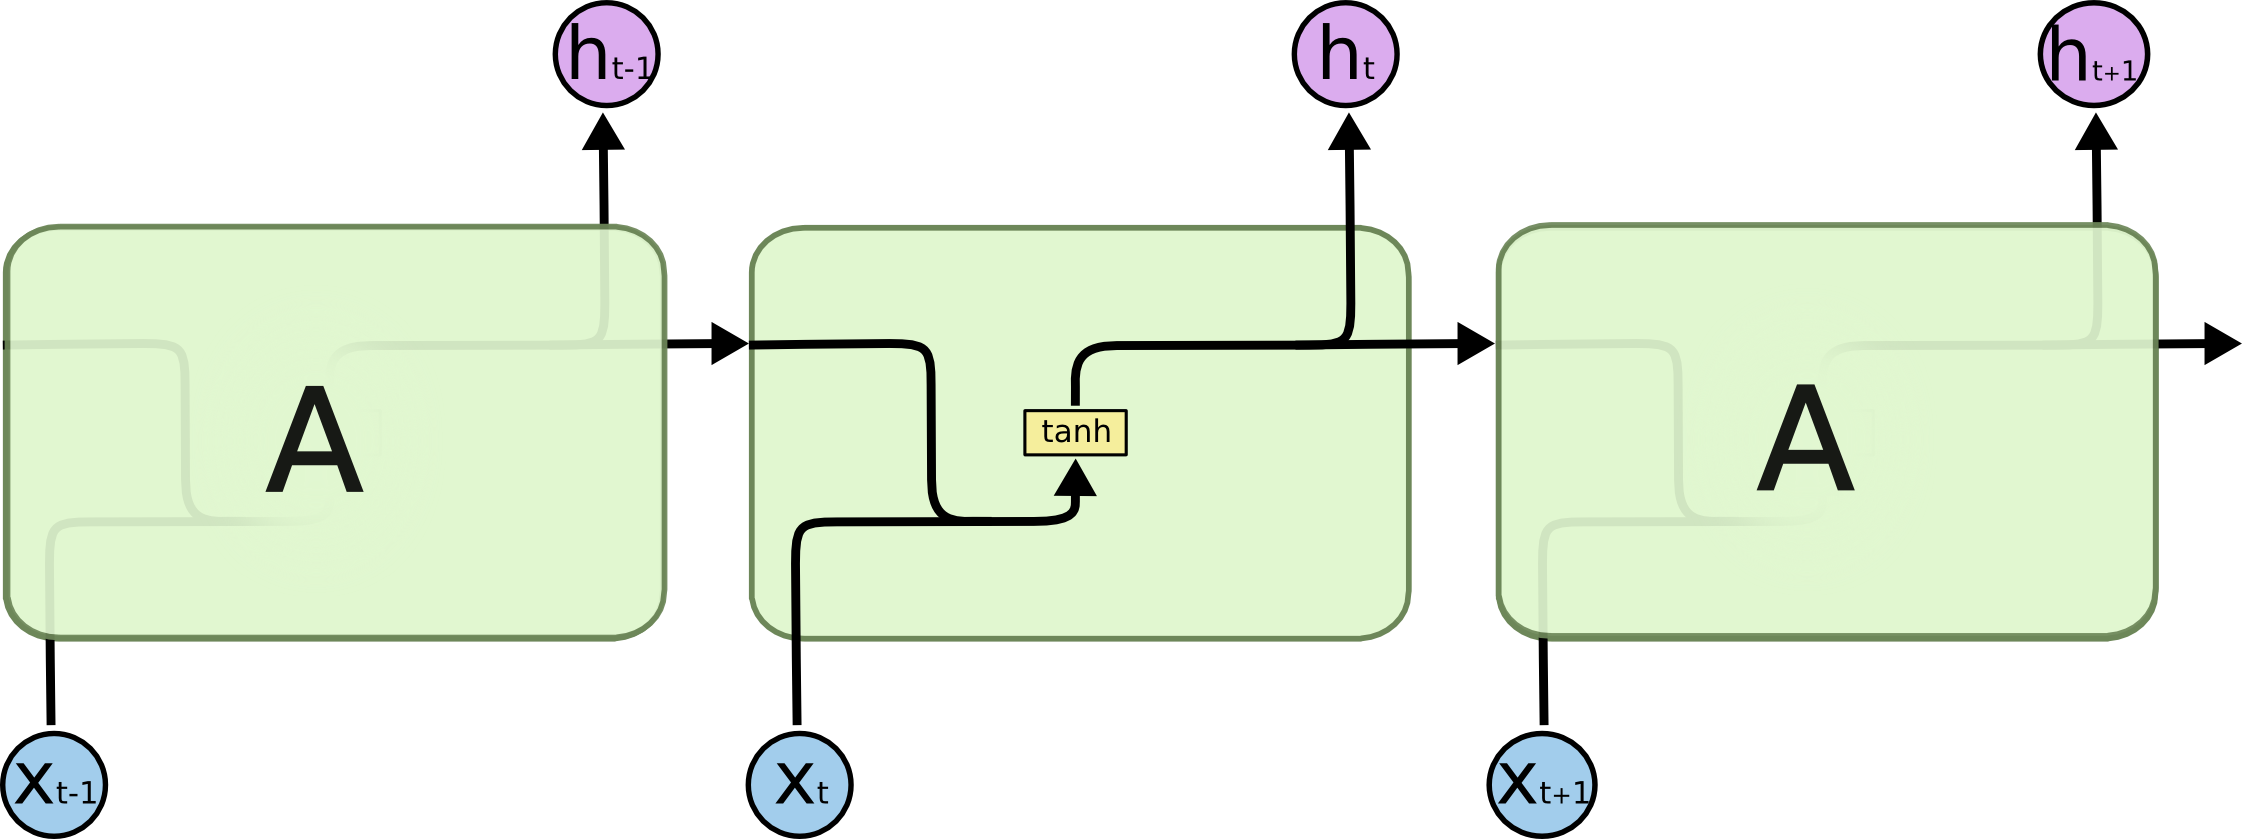

##### The repeating module in a standard RNN contains a single layer.

#### DrawBacks of RNN :-

1. Long Term Dependencies
2. Vanishing Gradient Problem with Time Series Forecasting

## LSTM Layer

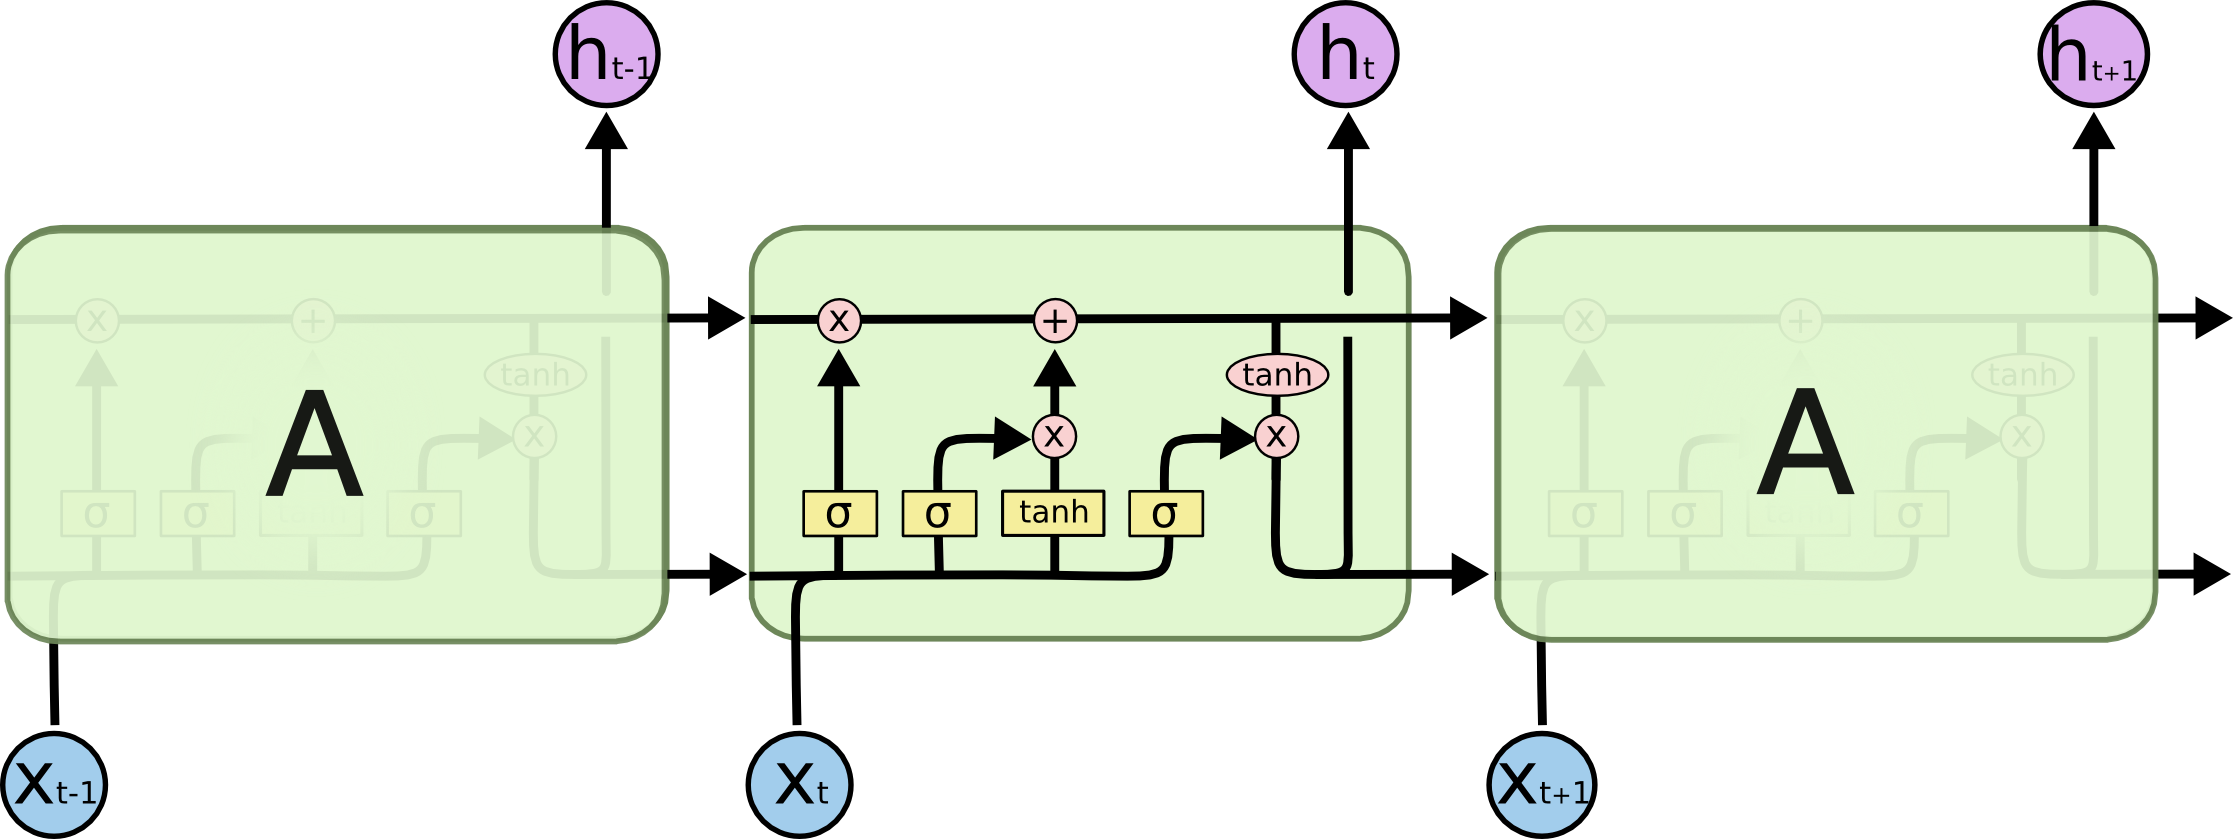

###### The repeating module in an LSTM contains four interacting layers.

####  Components of LSTM

1. Memory Cell (Horizontal Line, at the top)
2. Forget Gate (First Vertical Line)
3. Input Gate (The Middle Vertical Line with Tanh and the line left to it)
4. Output Gate (The vertical lines on extreme right)

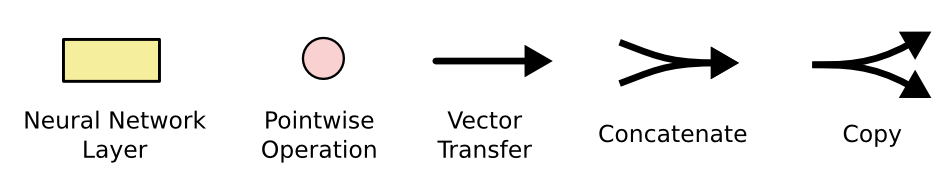

### 1. Memory Cell

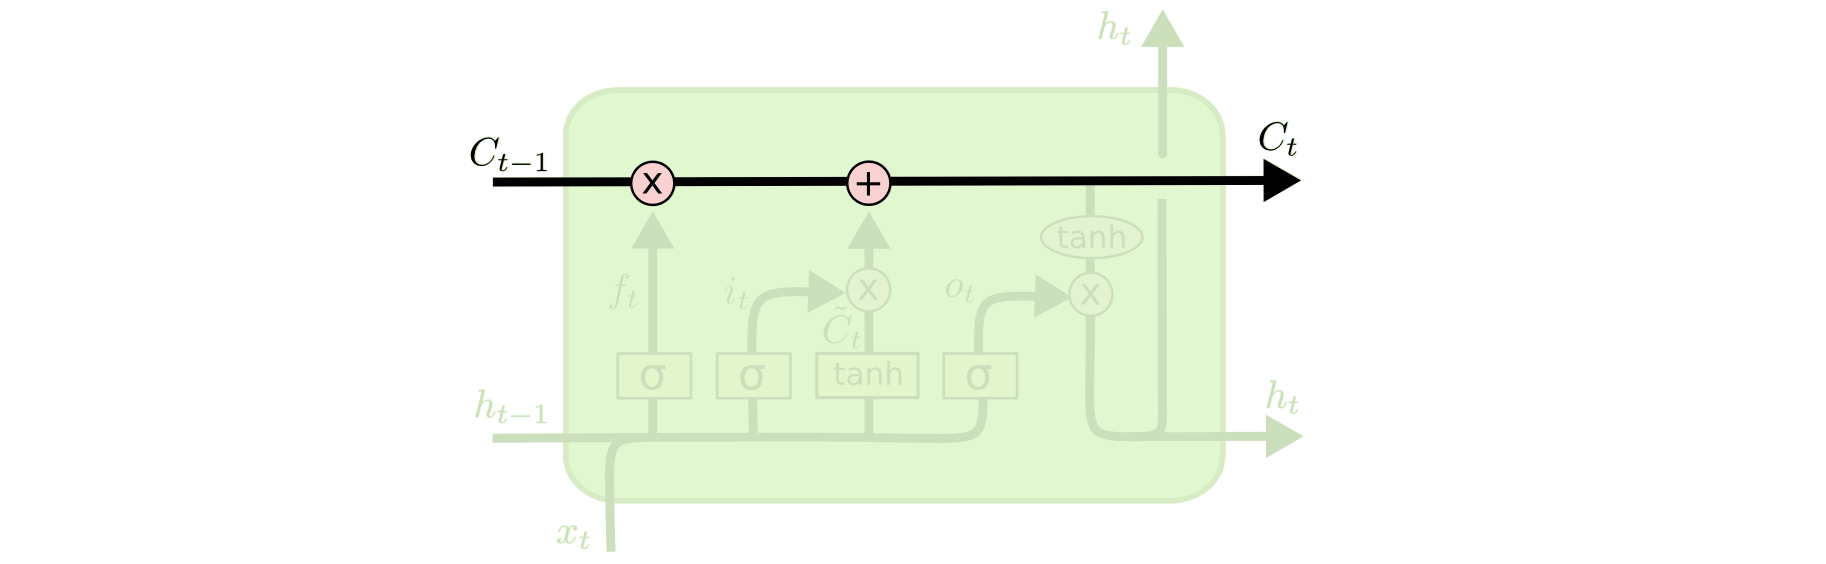

Remembering and Forgetting the Data based on the Context of the Input.
Has two Operations :-

    1. Point Wise Operation :- This operation is used either to keep or to eliminate the data.
    
    Multiplication of Previous State Output C (t-1) like [2,4,3,5,6] with the Output of Forget Gate like [1,0,1,1,0]. Where 0 is present in  the Forget Gate, that data is eliminated.
    
    So, after Point Wise Operation, the data present is [2,0,3,5,0].
    
    2. Addition Operation :- As the context changes some data is forgotten and some data must be added and this is done by  this operation.
    
    

### 2. Forget Gate

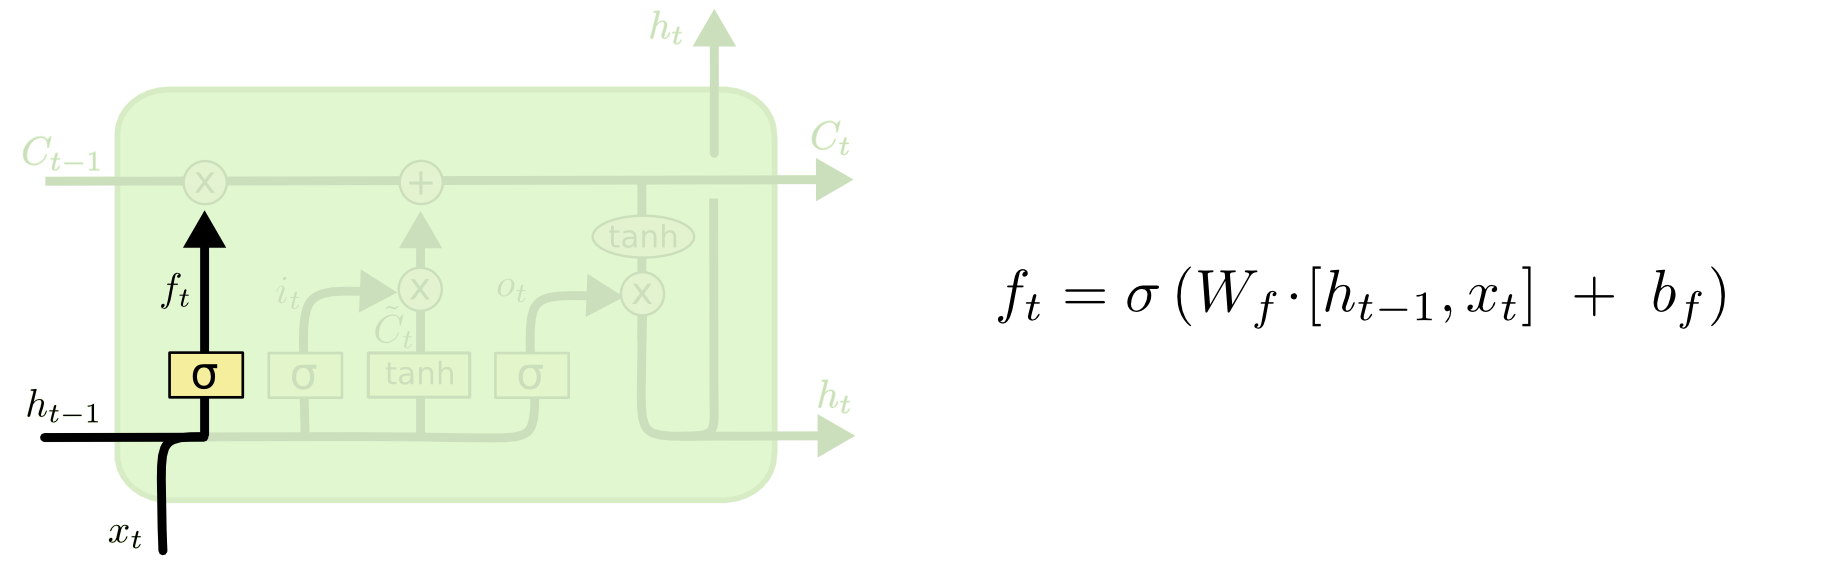

Takes two inputs :- output @ t-1 (h t-1), input @ t (x t) and are Concatenated

W (f) => Concatenated Weight. Both, the previous output and current input have some weights which are concatenated at W (f)

b (f) => Bias

Now the entire formula is of the form y = mx + c, And it is passed to Sigmoid function. And values are converted into [0,1]

### 3. Input Gate

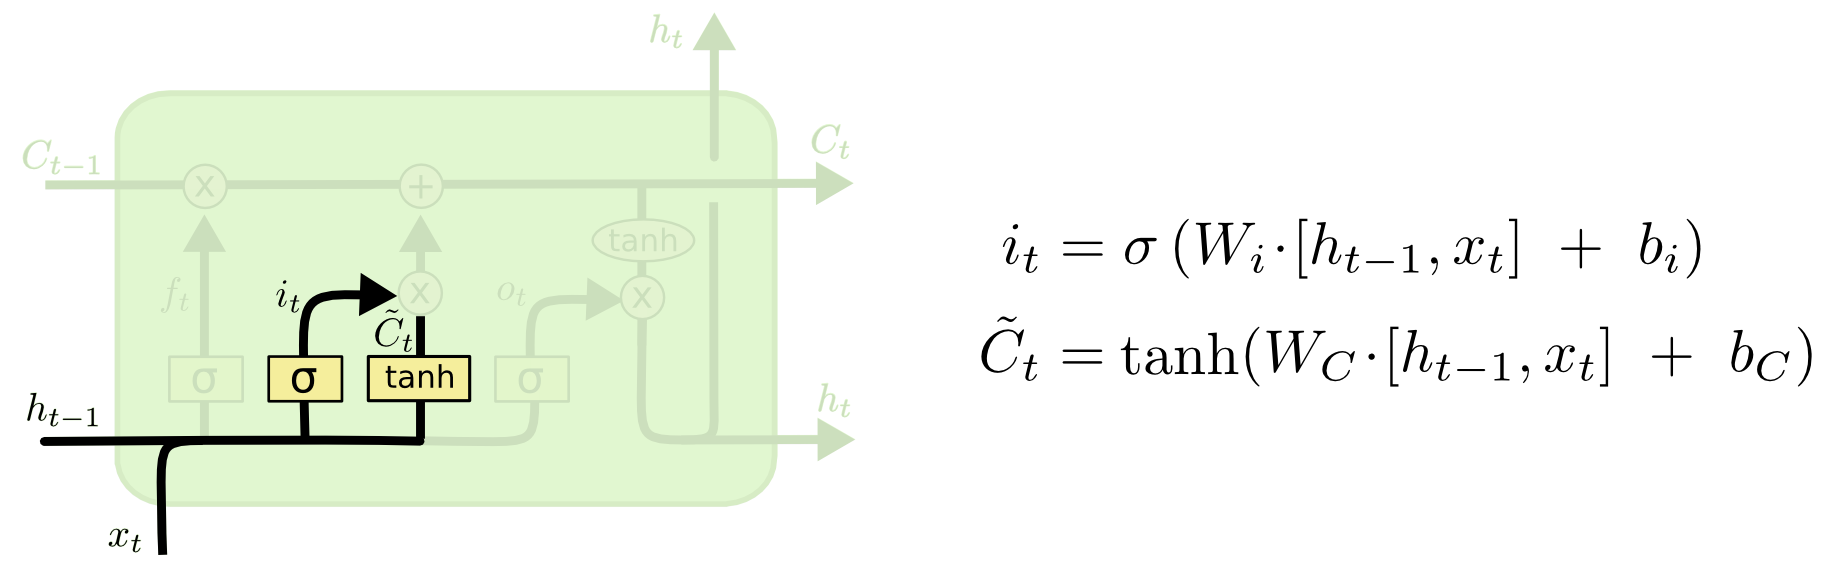

The same input which is sent to Forget Gate is sent to Input Gate

Two Operations are performed :-

1. Sigmoid (As same as the Sigmoid operation in the Forget Gate)
2. Tanh


Tanh will convert the values to [-1,1]

The PointWise Operation is Performed on the Output of Sigmoid Operation and the output of Tanh Operation.

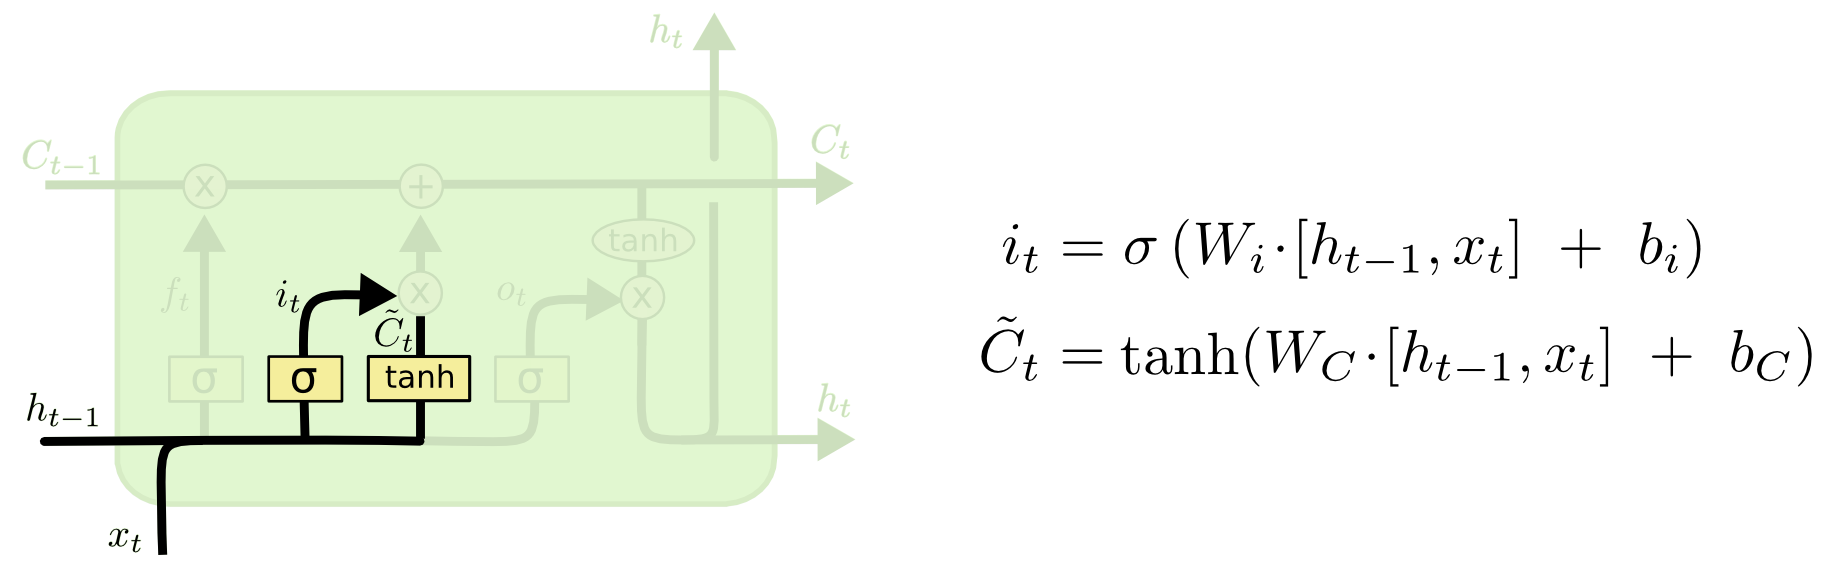

The output of the Pointwise operation is added to the Memory Gate and there the Addition Operation is Performed.

### 4. Output Gate

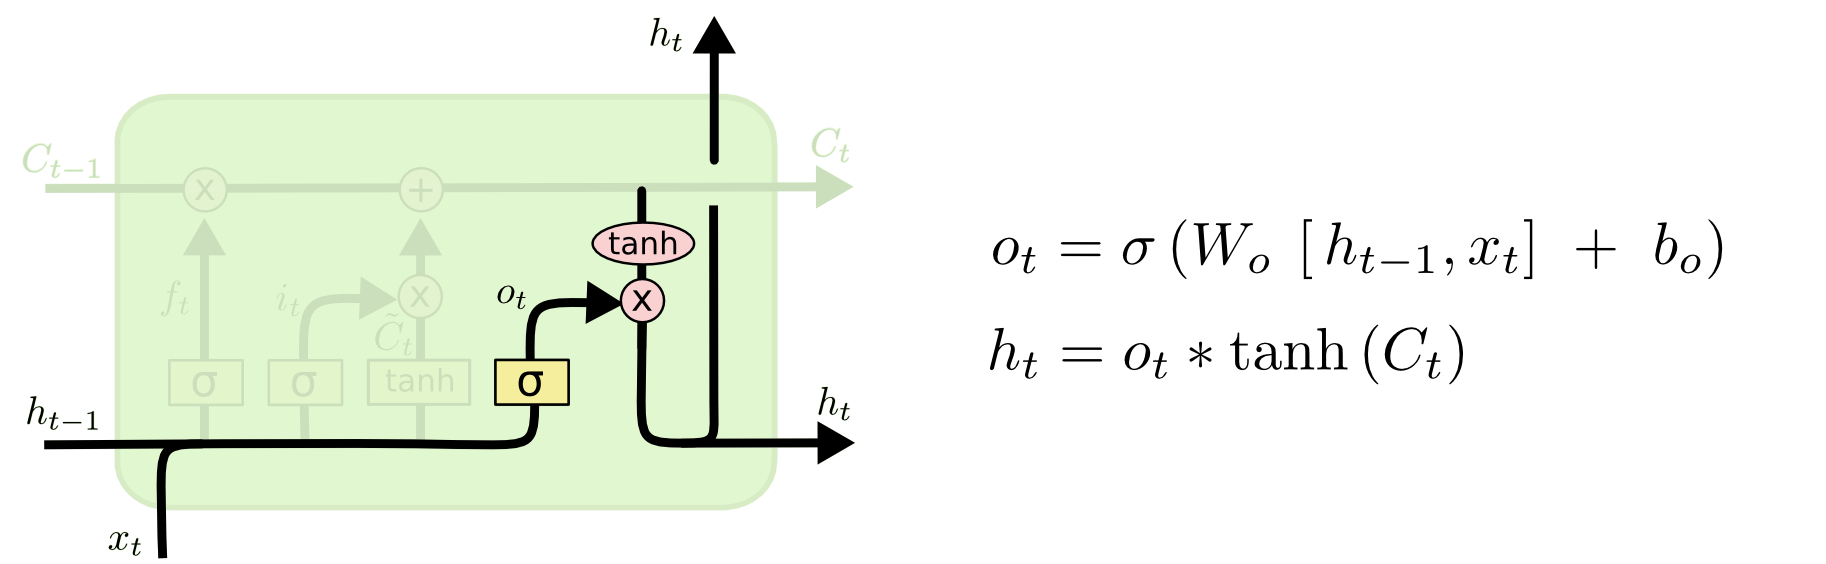

The output is stored and is also sent to the next cell as input.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# RNN has the Vanishing Gradient Problem especially in Time Series Forecasting


from tensorflow.keras.layers import Dense, LSTM
# LSTM is a special Kind of RNN, designed to avoid the long term dependency problem and vanishing gradient problem.
# Dense is to create Hidden Layers, LSTM Model is used for forecasting time series data.

from tensorflow.keras.models import Sequential
#what ever be the Neural Network we must import Sequential, Sequential is used to add the layers.

from sklearn.preprocessing import MinMaxScaler
# MinMax Scaler converts the range of values to [0,1]

pd.options.mode.chained_assignment = None
tf.random.set_seed(0)


import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_excel('Data.xlsx')
df.head(2)

,Type,Date,Data
0,1,2021-09-30,3.648926
1,1,2021-10-31,3.527193


## Data with Type == 1

In [11]:
df.shape

(36, 3)

In [12]:
df_1 = df[df['Type']==1]
df_1.head(2)

,Type,Date,Data
0,1,2021-09-30,3.648926
1,1,2021-10-31,3.527193


,Date,Data
0,2021-09-30,8.568212
1,2021-10-31,11.290088
2,2021-11-30,9.042412
3,2021-12-31,9.012319
4,2022-01-31,8.985760


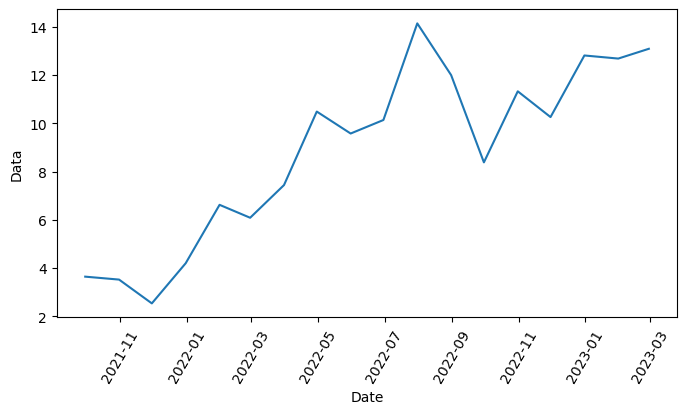

In [13]:
plt.figure(figsize=(8,4))


sns.lineplot(x=df_1['Date'],y=df_1['Data'])
plt.xticks(rotation=60)
plt.show()

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.4832
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 0.4678
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 0.4522
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 0.4364
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4201
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 0.4034
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 0.3862
Epoch 8/100
1/1 [==============================] - 0s 0s/step - loss: 0.3684
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 0.3501
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 0.3311
Epoch 11/100
1/1 [==============================] - 0s 0s/step - loss: 0.3114
Epoch 12/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2910
Epoch 13/100
1/1 [==============================] - 0s 0s/step 

<AxesSubplot:xlabel='Date'>

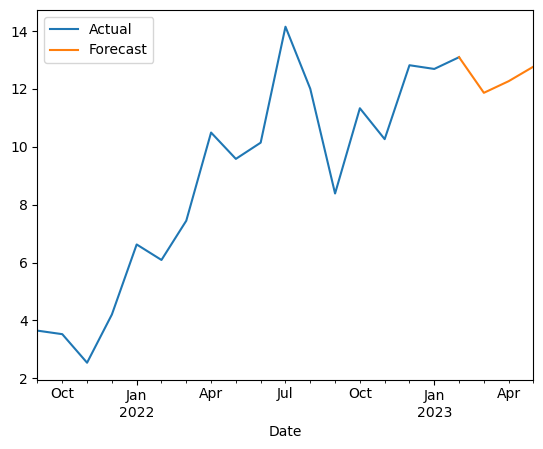

In [14]:
y = df_1['Data']
y = y.values.reshape(-1, 1)

# scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(y)
# As the range of tanh [-1,1] and range of sigmoid is [0,1] so we use MinMax scaler.

y = scaler.transform(y)

# generate the input and output sequences

n_lookback = 4  
#length of input sequences/number of data points are to be used to predict the next sequence.

n_forecast = 3 
#length of output sequences/numbers of points to be predicted using the look_back

X = []
Y = []

for i in range(n_lookback, len(y) - n_forecast + 1):
    X.append(y[i - n_lookback: i])
    # Dividing the Data into Sequences (Here, 4) of data
    Y.append(y[i: i + n_forecast])

X = np.array(X)
Y = np.array(Y)

# fit the model
model = Sequential()
# Adding the Neural Network Layers with LSTM

model.add(LSTM(units=50, return_sequences=True, input_shape=(n_lookback, 1),
               activation='tanh', recurrent_activation='sigmoid',kernel_initializer='glorot_uniform'))
# units is to add the number of neurons 50(here), it is known by using hyperparameter Optimizing techniques 
# Return Sequences is whether to return the entire sequence with output or the single output. By default, it is False
# Input_shape - is the size of the input that we provide
# Activation Function - Tanh
# Recurrent Activation Function - Sigmoid
# Kernel_initializer is to initialize the weights for the input.
# Uniform distribution (or) Glorot distribution works well with the Sigmoid and Tanh Functions.
 


model.add(LSTM(units=50))
# Adding 50 Neurons for the second layer

model.add(Dense(n_forecast))


model.compile(loss='mean_squared_error', optimizer='adam')
# Loss Function is Mean Squared Error Bec the Data is Continuous, for categorical data, we can use loss = 'binary_crossentropy'
# Optimizers are Stochastic Gradient Descent(SGD), AdaDelta , AdaGrad, RMSPROP, adam
# Optimizers are used to decrease the Loss function

model.fit(X, Y, epochs=100, batch_size=32, verbose=1)
# Verbose = 1 to Display the Training of the model for every epoch, we can use verbose = 0 to not to display anything. 

# generate the forecasts
X_ = y[- n_lookback:]  # last available input sequence
X_ = X_.reshape(1, n_lookback, 1)

Y_ = model.predict(X_).reshape(-1, 1)
Y_ = scaler.inverse_transform(Y_)

# organize the results in a data frame
df_past = df_1[['Date','Data']]
df_past.rename(columns={'Data': 'Actual'}, inplace=True)
df_past['Date'] = pd.to_datetime(df_past['Date'])
df_past['Forecast'] = np.nan
df_past['Forecast'].iloc[-1] = df_past['Actual'].iloc[-1]

df_future = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
df_future['Date'] = pd.date_range(start=df_past['Date'].iloc[-1] + pd.Timedelta(1,"d"), periods=n_forecast,freq='1M')
df_future['Forecast'] = Y_.flatten()
df_future['Actual'] = np.nan

results = df_past.append(df_future).set_index('Date')

results.plot()

In [15]:
results.iloc[-3:]

,Actual,Forecast
Date,,
2023-03-31,NaN,11.863491
2023-04-30,NaN,12.265739
2023-05-31,NaN,12.768351


## Data with Type == 2

In [16]:
df_2 = df[df['Type']==2]
df_2.head(2)

,Type,Date,Data
18,2,2021-09-30,6.790430
19,2,2021-10-31,7.284296


In [17]:
df_2 = df_2[['Date','Data']]
df_2.head()

,Date,Data
18,2021-09-30,6.790430
19,2021-10-31,7.284296
20,2021-11-30,5.751131
21,2021-12-31,7.216150
22,2022-01-31,8.149410


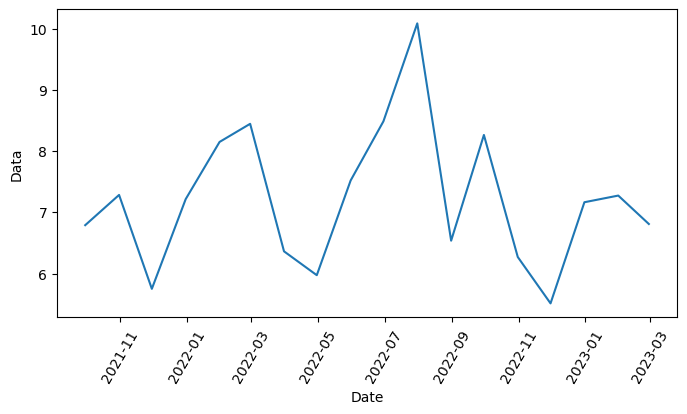

In [18]:
plt.figure(figsize=(8,4))


sns.lineplot(x=df_2['Date'],y=df_2['Data'])
plt.xticks(rotation=60)
plt.show()

1/1 [==============================] - 0s 439ms/step


<AxesSubplot:xlabel='Date'>

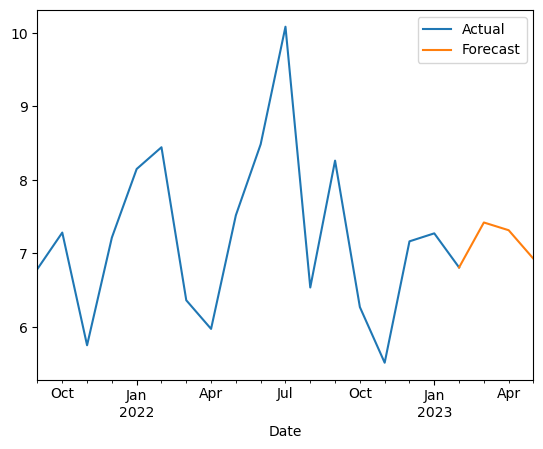

In [20]:
y = df_2['Data']
y = y.values.reshape(-1, 1)

# scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(y)
# As the range of tanh [-1,1] and range of sigmoid is [0,1] so we use MinMax scaler.

y = scaler.transform(y)

# generate the input and output sequences

n_lookback = 4  
#length of input sequences/number of data points are to be used to predict the next sequence.

n_forecast = 3 
#length of output sequences/numbers of points to be predicted using the look_back

X = []
Y = []

for i in range(n_lookback, len(y) - n_forecast + 1):
    X.append(y[i - n_lookback: i])
    # Dividing the Data into Sequences (Here, 4) of data
    Y.append(y[i: i + n_forecast])

X = np.array(X)
Y = np.array(Y)

# fit the model
model = Sequential()
# Adding the Neural Network Layers with LSTM

model.add(LSTM(units=50, return_sequences=True, input_shape=(n_lookback, 1),
               activation='tanh', recurrent_activation='sigmoid',kernel_initializer='glorot_uniform'))
# units is to add the number of neurons 50(here), it is known by using hyperparameter Optimizing techniques 
# Return Sequences is whether to return the entire sequence with output or the single output. By default, it is False
# Input_shape - is the size of the input that we provide
# Activation Function - Tanh
# Recurrent Activation Function - Sigmoid
# Kernel_initializer is to initialize the weights for the input.
# Uniform distribution (or) Glorot distribution works well with the Sigmoid and Tanh Functions.
 


model.add(LSTM(units=50))
# Adding 50 Neurons for the second layer

model.add(Dense(n_forecast))


model.compile(loss='mean_squared_error', optimizer='adam')
# Loss Function is Mean Squared Error Bec the Data is Continuous, for categorical data, we can use loss = 'binary_crossentropy'
# Optimizers are Stochastic Gradient Descent(SGD), AdaDelta , AdaGrad, RMSPROP, adam
# Optimizers are used to decrease the Loss function

model.fit(X, Y, epochs=100, batch_size=32, verbose=0)
# Verbose = 1 to Display the Training of the model for every epoch, we can use verbose = 0 to not to display anything. 

# generate the forecasts
X_ = y[- n_lookback:]  # last available input sequence
X_ = X_.reshape(1, n_lookback, 1)

Y_ = model.predict(X_).reshape(-1, 1)
Y_ = scaler.inverse_transform(Y_)

# organize the results in a data frame
df_past = df_2[['Date','Data']]
df_past.rename(columns={'Data': 'Actual'}, inplace=True)
df_past['Date'] = pd.to_datetime(df_past['Date'])
df_past['Forecast'] = np.nan
df_past['Forecast'].iloc[-1] = df_past['Actual'].iloc[-1]

df_future = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
df_future['Date'] = pd.date_range(start=df_past['Date'].iloc[-1] + pd.Timedelta(1,"d"), periods=n_forecast,freq='1M')
df_future['Forecast'] = Y_.flatten()
df_future['Actual'] = np.nan

results = df_past.append(df_future).set_index('Date')

results.plot()